In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump, load
%matplotlib inline

In [37]:
df = pd.read_csv("Copper_Set.xlsx - Result 1.csv")  

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.1511,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.025,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.128,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [39]:
print(f"num rows:{df.shape[0]}\nnum cols:{df.shape[1]}")

num rows:181673
num cols:14


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [41]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [42]:
# Changing data frmats to correct data formats
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


In [43]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [44]:
missing_values_count = df.isnull().sum()
print(f"missing value count:\n{missing_values_count}\nmissing value percentage:\n{missing_values_count/df.shape[0]*100}")

missing value count:
id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64
missing value percentage:
id                0.001101
item_date         0.001651
quantity tons     0.000550
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.001651
selling_price     0.000550
dtype: float64


In [45]:
df["material_ref"].nunique()

16562

In [46]:
df["material_ref"].unique()

array(['DEQ1 S460MC', '104991', 'S0380700', ..., 'MAS65550',
       '4.11043_1060X5_BRE', '202006170005.IO.1.1'], dtype=object)

In [47]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [48]:
missing_values_count = df.isnull().sum()
print(f"missing value count:\n{missing_values_count}\nmissing value percentage:\n{missing_values_count/df.shape[0]*100}")

missing value count:
id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
missing value percentage:
id               0.0
item_date        0.0
quantity tons    0.0
customer         0.0
country          0.0
status           0.0
item type        0.0
application      0.0
thickness        0.0
width            0.0
material_ref     0.0
product_ref      0.0
delivery date    0.0
selling_price    0.0
dtype: float64


In [50]:
df[df["status"] == "Lost"]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
171,C0BF3187-C4B3-4C63-ABDB-FCB0642A69C0,2021-04-01,8.718789,30223403.0,78.0,Lost,W,10.0,1.00,1500.0,unknown,1668701718,2021-07-01,1253.0
174,66D8E20C-AF4A-47D7-8FDD-51DEA6EA1F05,2021-04-01,39.553513,30165992.0,77.0,Lost,S,10.0,1.00,1500.0,FZPA004640,164141591,2021-08-01,1225.0
175,4532B5EF-0446-4880-BC8E-242E89AB8DD6,2021-04-01,11.454558,30223403.0,78.0,Lost,W,10.0,4.00,1500.0,unknown,1668701718,2021-07-01,1186.0
176,EE0BA8DE-38E9-4101-ADF9-B7B5B19A3525,2021-04-01,37.655526,30165992.0,77.0,Lost,S,10.0,0.80,1250.0,FZPA004640,164141591,2021-08-01,1249.0
179,1CDD04C3-6310-431F-B10A-F1C6B4F529DD,2021-04-01,10.291602,30223403.0,78.0,Lost,W,10.0,0.80,1500.0,unknown,1668701718,2021-07-01,1284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,63.859521,30161559.0,30.0,Lost,S,10.0,5.85,1525.0,unknown,640665,2020-08-01,457.0
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,56.028562,30161559.0,30.0,Lost,S,10.0,7.85,1500.0,unknown,640665,2020-08-01,458.0
181531,BF93A919-5970-428F-9467-7A2D0573C5C6,2020-07-02,206.224110,30161559.0,30.0,Lost,S,10.0,3.85,1830.0,unknown,640665,2020-08-01,460.0
181533,FA54AED7-360E-4DED-96AA-F69D127267B8,2020-07-02,102.993849,30198408.0,25.0,Lost,S,10.0,1.40,1150.0,unknown,1668701718,2020-07-01,725.0


In [25]:
df.to_csv("copper cleaned data.csv")

In [35]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Lost,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Lost,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Lost,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Lost,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Lost,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Lost,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Lost,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Lost,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Lost,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


# Univariate Analysis

In [14]:
columns = df.columns

In [15]:
for column in columns:
    print(f"{column} has {df[column].nunique()} unique values")

id has 181631 unique values
item_date has 250 unique values
quantity tons has 181631 unique values
customer has 1167 unique values
country has 17 unique values
status has 9 unique values
item type has 7 unique values
application has 30 unique values
thickness has 594 unique values
width has 1386 unique values
material_ref has 16563 unique values
product_ref has 33 unique values
delivery date has 26 unique values
selling_price has 9795 unique values


quantity tons, application, thickness, width, selling_price can be considered as continuous variables

## quantity tons

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quantity tons'>

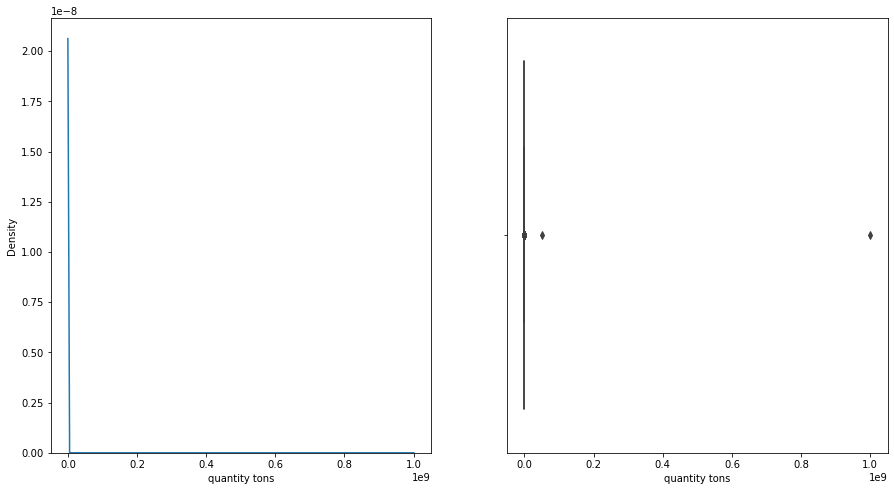

In [16]:
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df["quantity tons"], ax = ax[0], hist = False)

#fig,ax = plt.subplots(1,1)
sns.boxplot(df["quantity tons"], ax = ax[1])

**qty tons can not be negative**

In [17]:
df.shape

(181631, 14)

In [18]:
df = df[df["quantity tons"]>0]
df.shape

(181627, 14)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

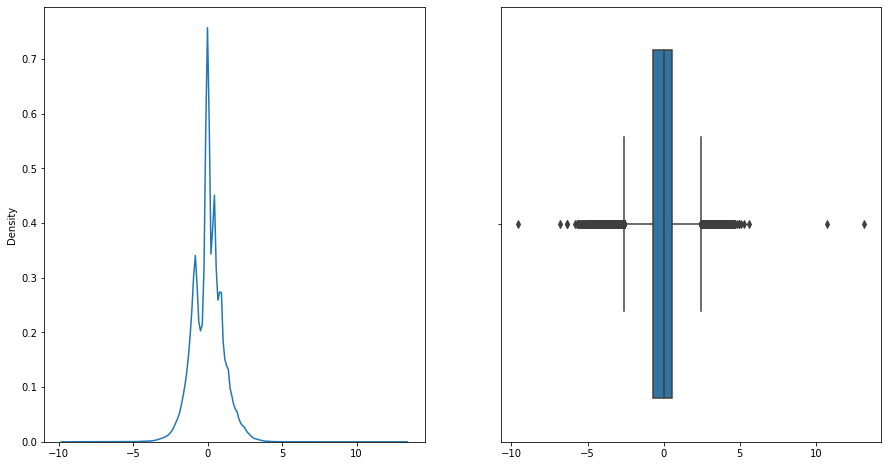

In [19]:
from sklearn.preprocessing import PowerTransformer
pt_qty = PowerTransformer(method='box-cox')
pty_bc = pt_qty.fit_transform(df["quantity tons"].values.reshape(-1, 1))
dump(pt_qty,open("pt_qty.pkl", "wb"))
pt_qty = load(open('pt_qty.pkl', 'rb'))
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(pty_bc, ax = ax[0], hist = False)
sns.boxplot(pty_bc, ax = ax[1])

In [21]:
pt_qty.transform(np.array(3).reshape(-1,1))[0][0]

-1.5762823761508777

In [22]:
pt_qty.inverse_transform(np.array(-1.5762823761508777).reshape(-1,1))

array([[3.]])

**use pt_qty model to transform a new quantity tons**

In [23]:
df["quantity_tons_box_cox"] = pty_bc

In [24]:
def return_outlier_mask(ser):
    """returns a mask to filter out outliers based on a series"""
    percentile25 = ser.quantile(0.25)
    percentile75 = ser.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    mask = (ser < upper_limit) & (ser > lower_limit)
    return mask
    

## application

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='application'>

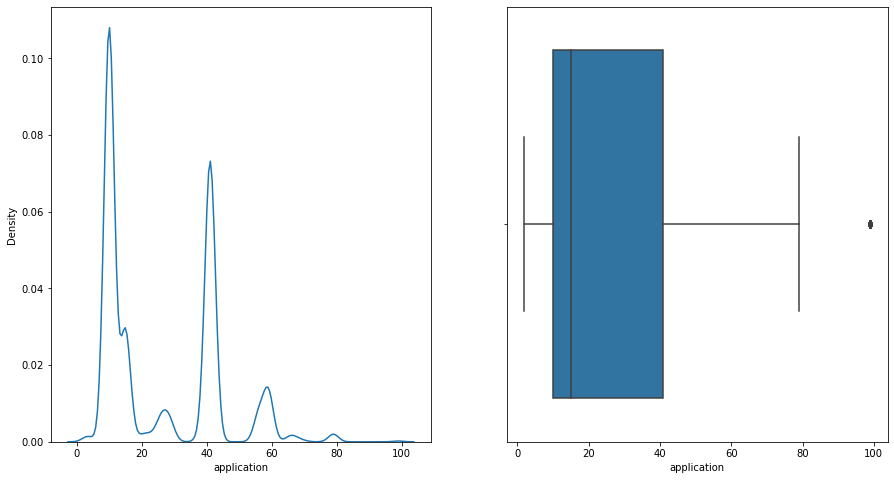

In [25]:
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df["application"], ax = ax[0], hist = False)

#fig,ax = plt.subplots(1,1)
sns.boxplot(df["application"], ax = ax[1])

**No need to remove outliers or any transformation on application**

## thickness

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thickness'>

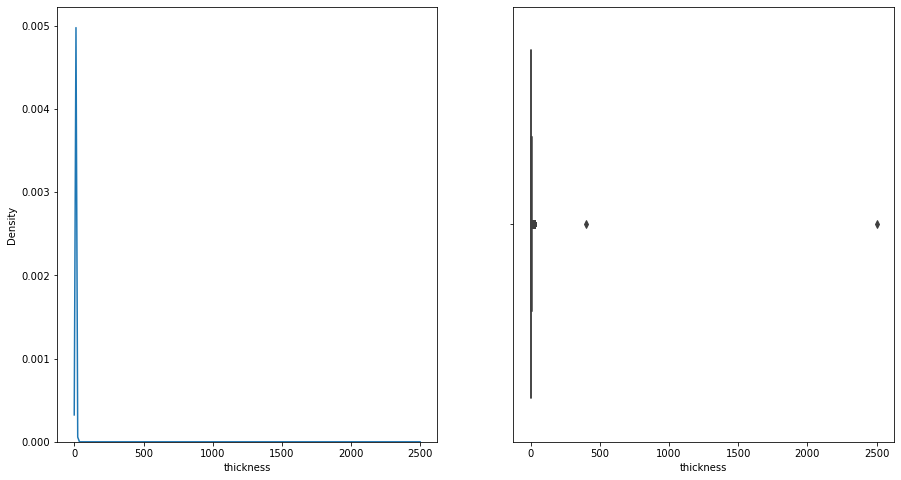

In [26]:
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df["thickness"], ax = ax[0], hist = False)

#fig,ax = plt.subplots(1,1)
sns.boxplot(df["thickness"], ax = ax[1])

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

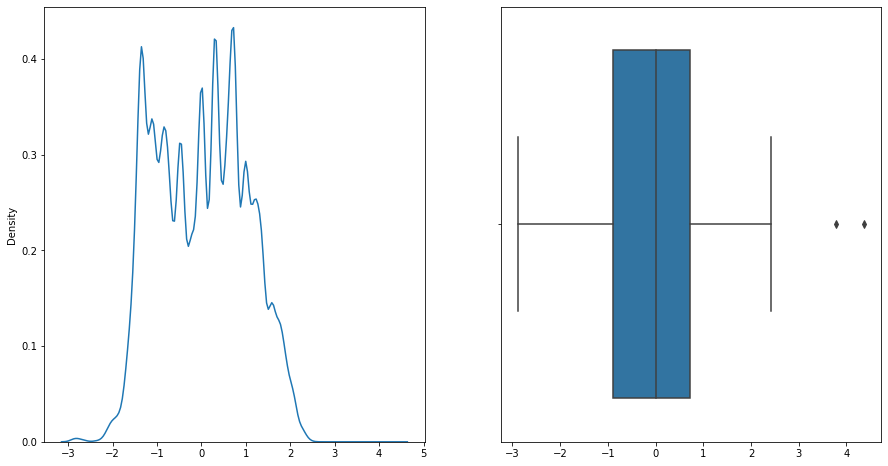

In [27]:
from sklearn.preprocessing import PowerTransformer
pt_thickness = PowerTransformer(method='box-cox')
pty_thickness = pt_thickness.fit_transform(df["thickness"].values.reshape(-1, 1))
dump(pt_thickness,open("pt_thickness.pkl", "wb"))
pt_thickness = load(open('pt_thickness.pkl', 'rb'))
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(pty_thickness, ax = ax[0], hist = False)
sns.boxplot(pty_thickness, ax = ax[1])

**use pt_thickness model to transform a new thickness**

In [28]:
df["thickness_box_cox"] = pty_thickness

## width

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='width'>

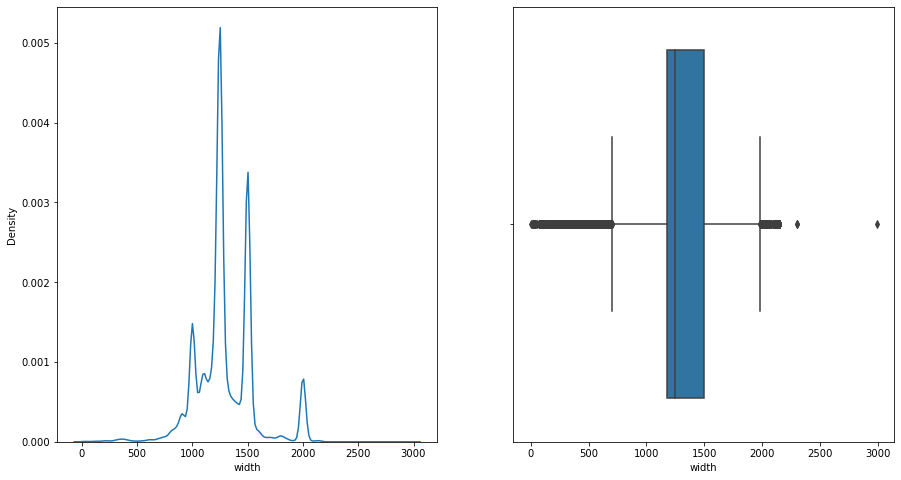

In [29]:
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df["width"], ax = ax[0], hist = False)

#fig,ax = plt.subplots(1,1)
sns.boxplot(df["width"], ax = ax[1])

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

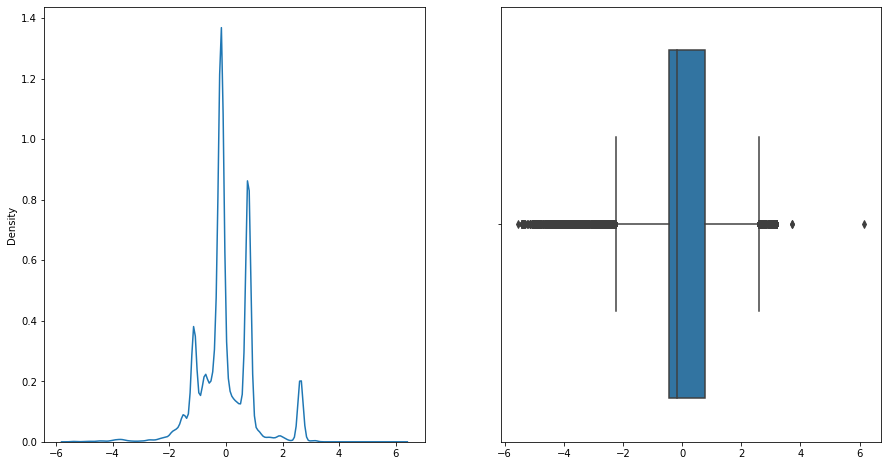

In [30]:
from sklearn.preprocessing import PowerTransformer
pt_width = PowerTransformer(method='box-cox')
pty_width = pt_width.fit_transform(df["width"].values.reshape(-1, 1))
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(pty_width, ax = ax[0], hist = False)
sns.boxplot(pty_width, ax = ax[1])

**no need to transform width**

## selling_price

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='selling_price'>

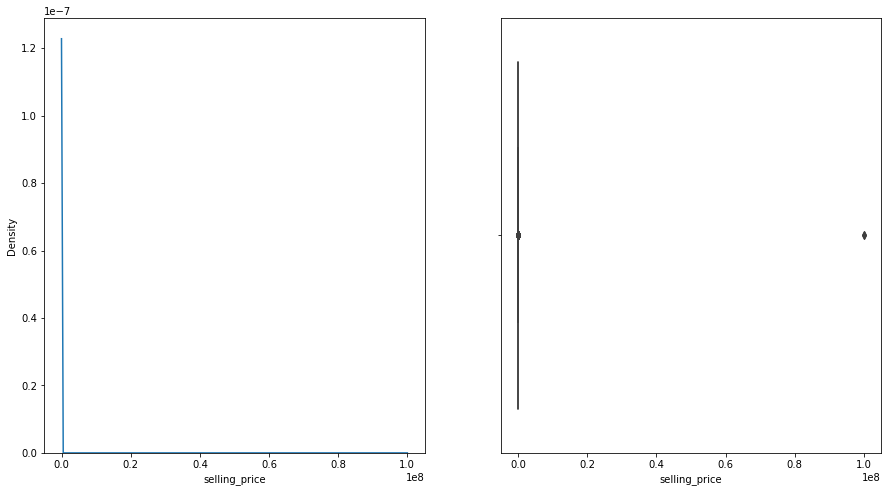

In [31]:
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df["selling_price"], ax = ax[0], hist = False)

#fig,ax = plt.subplots(1,1)
sns.boxplot(df["selling_price"], ax = ax[1])

**selling price can not be negative**

In [32]:
df = df[df["selling_price"]>0]

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

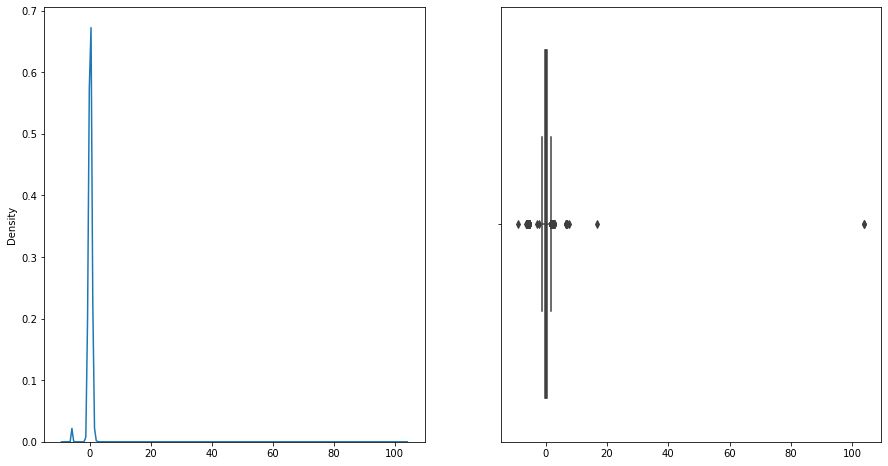

In [33]:
from sklearn.preprocessing import PowerTransformer
pt_sp = PowerTransformer(method='box-cox')
pty_sp = pt_sp.fit_transform(df["selling_price"].values.reshape(-1, 1))
dump(pt_sp,open("pt_sp.pkl", "wb"))
pt_sp = load(open('pt_sp.pkl', 'rb'))
fig,ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(pty_sp, ax = ax[0], hist = False)
sns.boxplot(pty_sp, ax = ax[1])

In [34]:
pty_sp_reverse =  

In [35]:
pty_sp_reverse

array([[ 854.  ],
       [1047.  ],
       [ 644.33],
       ...,
       [ 589.  ],
       [ 619.  ],
       [ 607.  ]])

In [36]:
df["selling_price"]

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181667     602.00
181668     591.00
181669     589.00
181670     619.00
181672     607.00
Name: selling_price, Length: 181620, dtype: float64

In [37]:
df["selling_price_boxcox"] = pty_sp

In [38]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,0.408936,0.316861,0.213644
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,2.282139,-0.729442,0.675986
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,1.791441,-1.726431,-0.395350
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,1.333757,0.460845,-0.019841
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,2.298278,0.994387,-0.624732


In [39]:
print(f"num rows left after transforming continuous data:{df.shape[0]}")

num rows left after transforming continuous data:181620


**we will remove quantity tons, thickness, selling_price and keep their box-cox trnasformed data. We will predict selling price and inverse transform it to get actual selling price.**

In [40]:
df.drop(["quantity tons", "thickness", "selling_price"], axis=1, inplace = True)

In [41]:
df.head()

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,0.408936,0.316861,0.213644
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,2.282139,-0.729442,0.675986
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,1.791441,-1.726431,-0.395350
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,1.333757,0.460845,-0.019841
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,2.298278,0.994387,-0.624732


**dropping dates too**

In [42]:
df.drop(["item_date", "delivery date"], axis=1, inplace = True)

In [43]:
df.head()

,id,customer,country,status,item type,application,width,material_ref,product_ref,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,0.408936,0.316861,0.213644
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2.282139,-0.729442,0.675986
2,E140FF1B-2407-4C02-A0DD-780A093B1158,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,1.791441,-1.726431,-0.395350
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1.333757,0.460845,-0.019841
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2.298278,0.994387,-0.624732


**dropping customer too as new customer might come**

In [44]:
df.drop(["customer"], axis=1, inplace = True)

In [45]:
df.head()

,id,country,status,item type,application,width,material_ref,product_ref,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,0.408936,0.316861,0.213644
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,25.0,Won,W,41.0,1210.0,104991,1668701718,2.282139,-0.729442,0.675986
2,E140FF1B-2407-4C02-A0DD-780A093B1158,30.0,Won,WI,28.0,952.0,S0380700,628377,1.791441,-1.726431,-0.395350
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1.333757,0.460845,-0.019841
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2.298278,0.994387,-0.624732


# Train test split

In [102]:
from sklearn.model_selection import train_test_split
X=df.drop(["selling_price_boxcox"], axis = 1)
y=df['selling_price_boxcox']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 10)
(54486, 10)
(127134,)
(54486,)


## OHE country

In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_country = OneHotEncoder(handle_unknown='ignore')
ohe_country.fit(X_train[['country']])
dump(ohe_country,open("ohe_country.pkl", "wb"))
ohe_country = load(open('ohe_country.pkl', 'rb'))
ohe_tr_country = ohe_country.transform(X_train[['country']])
ohe_te_country = ohe_country.transform(X_test[['country']])

In [107]:
ohe_tr_country.shape

(127134, 17)

In [108]:
ohe_te_country.shape

(54486, 17)

In [109]:
ohe_tr_country

<127134x17 sparse matrix of type '<class 'numpy.float64'>'
	with 127134 stored elements in Compressed Sparse Row format>

## OHE status

In [110]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_status = OneHotEncoder(handle_unknown='ignore')
ohe_status.fit(X_train[['status']])
dump(ohe_status,open("ohe_status.pkl", "wb"))
ohe_status = load(open('ohe_status.pkl', 'rb'))
ohe_tr_status = ohe_status.transform(X_train[['status']])
ohe_te_status = ohe_status.transform(X_test[['status']])

In [111]:
print(ohe_tr_status.shape)
print(ohe_te_status.shape)

(127134, 8)
(54486, 8)


# OHE item type

In [112]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_item = OneHotEncoder(handle_unknown='ignore')
ohe_item.fit(X_train[['item type']])
dump(ohe_item,open("ohe_item.pkl", "wb"))
ohe_item = load(open('ohe_item.pkl', 'rb'))
ohe_tr_item = ohe_item.transform(X_train[['item type']])
ohe_te_item = ohe_item.transform(X_test[['item type']])

In [113]:
print(ohe_tr_item.shape)
print(ohe_te_item.shape)

(127134, 6)
(54486, 6)


In [114]:
df["application"].nunique()

30

# OHE application

In [115]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_app = OneHotEncoder(handle_unknown='ignore')
ohe_app.fit(X_train[['application']])
dump(ohe_app,open("ohe_app.pkl", "wb"))
ohe_app = load(open('ohe_app.pkl', 'rb'))
ohe_tr_app = ohe_app.transform(X_train[['application']])
ohe_te_app = ohe_app.transform(X_test[['application']])

In [116]:
print(ohe_tr_app.shape)
print(ohe_te_app.shape)

(127134, 30)
(54486, 30)


# material ref

In [117]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_mat = OneHotEncoder(handle_unknown='ignore')
ohe_mat.fit(X_train[['material_ref']])
dump(ohe_mat,open("ohe_mat.pkl", "wb"))
ohe_mat = load(open('ohe_mat.pkl', 'rb'))
ohe_tr_mat = ohe_mat.transform(X_train[['material_ref']])
ohe_te_mat = ohe_mat.transform(X_test[['material_ref']])

In [118]:
print(ohe_tr_mat.shape)
print(ohe_te_mat.shape)

(127134, 14917)
(54486, 14917)


# product ref

In [119]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_pro = OneHotEncoder(handle_unknown='ignore')
ohe_pro.fit(X_train[['product_ref']])
dump(ohe_pro,open("ohe_pro.pkl", "wb"))
ohe_pro = load(open('ohe_pro.pkl', 'rb'))
ohe_tr_pro = ohe_pro.transform(X_train[['product_ref']])
ohe_te_pro = ohe_pro.transform(X_test[['product_ref']])

In [120]:
print(ohe_tr_pro.shape)
print(ohe_te_pro.shape)

(127134, 33)
(54486, 33)


In [121]:
X_train.columns

Index(['id', 'country', 'status', 'item type', 'application', 'width',
       'material_ref', 'product_ref', 'quantity_tons_box_cox',
       'thickness_box_cox'],
      dtype='object')

In [122]:
ohe_tr_mat.shape

(127134, 14917)

In [143]:
X_train

,id,country,status,item type,application,width,material_ref,product_ref,quantity_tons_box_cox,thickness_box_cox
180032,4909CF33-8A72-4276-AC37-32300024B35A,26.0,Won,W,59.0,1330.0,"122.1330,0.500.00",1670798778,0.143482,1.193954
161514,7D24AECB-19EC-4D74-9752-27CAE033E7F9,78.0,Won,W,41.0,1246.0,typical basket,611993,1.029406,-1.427040
68697,E2FED4B9-1B5C-4817-B2C3-AE00644FDCD4,32.0,Won,W,10.0,1500.0,DC04-1020 X 2.00 CCPU,628377,0.041335,0.724118
133360,FF11DA4D-859F-49AA-8B79-B87FBECCBCF4,26.0,Not lost for AM,W,10.0,850.0,B CZ03202746946,611993,-0.610620,0.691271
105404,819EA2D4-C8B5-499F-B8D0-EC996AB7860A,27.0,Not lost for AM,S,59.0,2000.0,unknown,640665,0.418027,1.350767
...,...,...,...,...,...,...,...,...,...,...
119926,8E5C8534-9747-4010-BCC7-1E3D25D2956C,77.0,Lost,W,15.0,1500.0,S235JR+N-CL1 TD,640405,0.151918,1.761909
103703,0CEC4CBA-6A51-4772-89AF-8CDC44DDC09A,30.0,Won,W,10.0,1250.0,940056146,611993,-0.529314,-0.897921
131982,BFC1DF02-6F04-4229-B599-03B59D50714E,26.0,Won,W,56.0,234.8,50063234803,1722207579,0.434402,-1.033947
146917,0388951E-54CA-45ED-B9F5-9B38B59A8F9D,28.0,Lost,W,15.0,1000.0,"NASTLAMTDM0,6X1000",611993,-0.544089,-1.097878


In [124]:
from scipy.sparse import hstack
Train_X = hstack((X_train[['width', 'quantity_tons_box_cox', 'thickness_box_cox']].values, ohe_tr_country, ohe_tr_status,
                         ohe_tr_item, ohe_tr_app, ohe_tr_mat, ohe_tr_pro))

In [125]:
Test_X = hstack((X_test[['width', 'quantity_tons_box_cox', 'thickness_box_cox']].values, ohe_te_country, ohe_te_status,
                         ohe_te_item, ohe_te_app, ohe_te_mat, ohe_te_pro))

In [126]:
print(Train_X.shape)
print(Test_X.shape)

(127134, 15014)
(54486, 15014)


In [127]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [129]:
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
rand_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_grid, cv=4, scoring = "r2")
rand_search.fit(Train_X, y_train)


RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [2, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='r2')

In [130]:
rand_search.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)

In [131]:
rand_search.best_score_

0.6800869799233551

In [132]:
dt = DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)
dt.fit(Train_X, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)

In [138]:
#making predictions on training data
y_tr_pred = dt.predict(Train_X)

In [139]:
#making predictions on test data
y_te_pred = dt.predict(Test_X)

In [140]:
print(f"train r2-score:{r2_score(y_train, y_tr_pred)}")

train r2-score:0.7124210747153785


In [141]:
print(f"test r2-score:{r2_score(y_test, y_te_pred)}")

test r2-score:0.8059228652012268


In [142]:
dump(dt,open("dt_model.pkl", "wb"))


# Classification

In [150]:
df.shape

(181620, 11)

In [158]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

**Keeping only Won and Lost status**

In [163]:
df = df[(df['status'] == "Won") | (df["status"] == "Lost")]

In [164]:
df.shape

(150427, 11)

In [169]:
df.groupby(by = "status").count()['id']

status
Lost     34431
Won     115996
Name: id, dtype: int64

**we have 34431 rows of Lost and 115996 rows of Won**

In [172]:
df.head()

,id,country,status,item type,application,width,material_ref,product_ref,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,0.408936,0.316861,0.213644
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,25.0,Won,W,41.0,1210.0,104991,1668701718,2.282139,-0.729442,0.675986
2,E140FF1B-2407-4C02-A0DD-780A093B1158,30.0,Won,WI,28.0,952.0,S0380700,628377,1.791441,-1.726431,-0.395350
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1.333757,0.460845,-0.019841
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2.298278,0.994387,-0.624732


**We will drop id**

In [175]:
df.drop(['id'], axis = 1, inplace = True)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [177]:
from sklearn.model_selection import train_test_split
X=df.drop(["status"], axis = 1)
y=df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [212]:
dump(le, open("le.pkl", "wb"))

In [179]:
y_train_enc

array([1, 1, 1, ..., 1, 1, 1])

In [180]:
y_test_enc

array([1, 1, 0, ..., 1, 0, 1])

In [181]:
X

,country,item type,application,width,material_ref,product_ref,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
0,28.0,W,10.0,1500.0,DEQ1 S460MC,1670798778,0.408936,0.316861,0.213644
1,25.0,W,41.0,1210.0,104991,1668701718,2.282139,-0.729442,0.675986
2,30.0,WI,28.0,952.0,S0380700,628377,1.791441,-1.726431,-0.395350
3,32.0,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1.333757,0.460845,-0.019841
4,28.0,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2.298278,0.994387,-0.624732
...,...,...,...,...,...,...,...,...,...
181667,25.0,W,41.0,1240.0,1000222,164141591,0.883617,-0.506288,-0.537178
181668,25.0,W,41.0,1220.0,1000777,164141591,0.854783,-0.506288,-0.575336
181669,25.0,W,41.0,1500.0,1000227,164141591,1.353290,-0.518893,-0.582335
181670,25.0,W,41.0,1250.0,1004216,164141591,-1.342749,-0.879817,-0.479289


# OHE Categorical columns

In [182]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# OHE country
ohe_country = OneHotEncoder(handle_unknown='ignore')
ohe_country.fit(X_train[['country']])
dump(ohe_country,open("ohe_country2.pkl", "wb"))
ohe_country = load(open('ohe_country2.pkl', 'rb'))
ohe_tr_country = ohe_country.transform(X_train[['country']])
ohe_te_country = ohe_country.transform(X_test[['country']])
print(ohe_tr_country.shape)
print(ohe_te_country.shape)

# OHE item type
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_item = OneHotEncoder(handle_unknown='ignore')
ohe_item.fit(X_train[['item type']])
dump(ohe_item,open("ohe_item2.pkl", "wb"))
ohe_item = load(open('ohe_item2.pkl', 'rb'))
ohe_tr_item = ohe_item.transform(X_train[['item type']])
ohe_te_item = ohe_item.transform(X_test[['item type']])
print(ohe_tr_item.shape)
print(ohe_te_item.shape)

# OHE application
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_app = OneHotEncoder(handle_unknown='ignore')
ohe_app.fit(X_train[['application']])
dump(ohe_app,open("ohe_app2.pkl", "wb"))
ohe_app = load(open('ohe_app2.pkl', 'rb'))
ohe_tr_app = ohe_app.transform(X_train[['application']])
ohe_te_app = ohe_app.transform(X_test[['application']])
print(ohe_tr_app.shape)
print(ohe_te_app.shape)

# material ref
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_mat = OneHotEncoder(handle_unknown='ignore')
ohe_mat.fit(X_train[['material_ref']])
dump(ohe_mat,open("ohe_mat2.pkl", "wb"))
ohe_mat = load(open('ohe_mat2.pkl', 'rb'))
ohe_tr_mat = ohe_mat.transform(X_train[['material_ref']])
ohe_te_mat = ohe_mat.transform(X_test[['material_ref']])
print(ohe_tr_mat.shape)
print(ohe_te_mat.shape)

# product ref
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_pro = OneHotEncoder(handle_unknown='ignore')
ohe_pro.fit(X_train[['product_ref']])
dump(ohe_pro,open("ohe_pro2.pkl", "wb"))
ohe_pro = load(open('ohe_pro2.pkl', 'rb'))
ohe_tr_pro = ohe_pro.transform(X_train[['product_ref']])
ohe_te_pro = ohe_pro.transform(X_test[['product_ref']])
print(ohe_tr_pro.shape)
print(ohe_te_pro.shape)

(105298, 17)
(45129, 17)
(105298, 6)
(45129, 6)
(105298, 30)
(45129, 30)
(105298, 14193)
(45129, 14193)
(105298, 32)
(45129, 32)


In [184]:
from scipy.sparse import hstack
Train_X = hstack((X_train[['width', 'quantity_tons_box_cox', 'thickness_box_cox', "selling_price_boxcox"]].values, 
                  ohe_tr_country, ohe_tr_item, ohe_tr_app, ohe_tr_mat, ohe_tr_pro))

Test_X = hstack((X_test[['width', 'quantity_tons_box_cox', 'thickness_box_cox', "selling_price_boxcox"]].values, 
                 ohe_te_country, ohe_te_item, ohe_te_app, ohe_te_mat, ohe_te_pro))

In [185]:
print(Train_X.shape)
print(Test_X.shape)

(105298, 14282)
(45129, 14282)


In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# decision tree
dtr = DecisionTreeClassifier()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
rand_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_grid, cv=4, scoring = "f1_weighted")
rand_search.fit(Train_X, y_train_enc)


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='f1_weighted')

In [196]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)

In [197]:
rand_search.best_score_

0.7200253503853132

In [198]:
dt2 = DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
dt2.fit(Train_X, y_train_enc)

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)

In [199]:
#making predictions on training data
y_tr_pred = dt2.predict(Train_X)
#making predictions on test data
y_te_pred = dt2.predict(Test_X)

In [200]:
from sklearn.metrics import f1_score
print(f"Train f1 score : {f1_score(y_train_enc, y_tr_pred)}")
print(f"Train f1 score : {f1_score(y_test_enc, y_te_pred)}")

Train f1 score : 0.8627853710039406
Train f1 score : 0.8598332568869222


In [211]:
dump(dt2, open("dt2.pkl", "wb"))

In [203]:
le.inverse_transform(np.array(0).reshape(1,1))

array(['Lost'], dtype=object)

In [204]:
X_train

,country,item type,application,width,material_ref,product_ref,quantity_tons_box_cox,thickness_box_cox,selling_price_boxcox
130113,30.0,W,10.0,1248.0,.63X1248 HDX G7035 OYSTER,611993,0.029818,-1.033947,0.750249
7675,28.0,W,59.0,1500.0,DD11,1670798778,0.887668,0.684540,0.270335
169770,26.0,S,10.0,1070.0,unknown,164141591,-0.068145,-1.653059,-0.135637
132646,27.0,PL,10.0,1380.0,2180128466F60SES,640665,-0.904809,0.639381,-0.678731
140860,25.0,S,10.0,1000.0,8300-0100-1501000,1668701376,-0.043194,0.008009,-0.259737
...,...,...,...,...,...,...,...,...,...
111060,32.0,W,10.0,961.0,S320GD GRANITEHDX 55µ DF,611993,-0.603505,0.316861,0.581566
26156,84.0,W,79.0,1238.0,700306,164141591,1.726806,-0.729442,0.597519
30963,32.0,W,59.0,1479.0,HRCL_S-355 JR CL3 5X1479,640665,0.721822,1.193954,0.011156
77081,84.0,W,29.0,1250.0,unknown,611993,-0.626819,-1.097878,0.631409


In [208]:
pt_sp.inverse_transform(np.array(0.750249).reshape(-1,1))

array([[1081.01003912]])

In [210]:
Train_X.shape

(105298, 14282)